# Oversampling

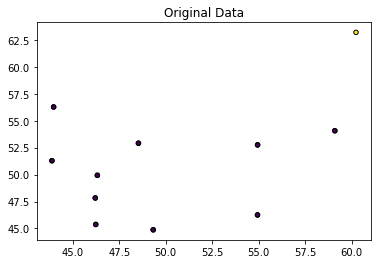

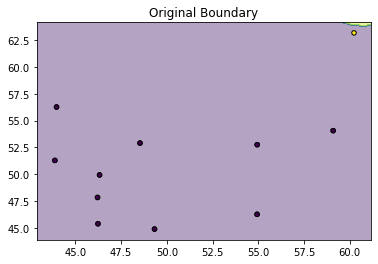

|    |   Yellow Accuracy  |   Purple Accuracy  |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|---------------------:|
|  0 |                  0 |                  1 |                  0.5 |


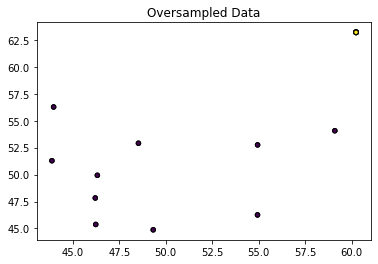

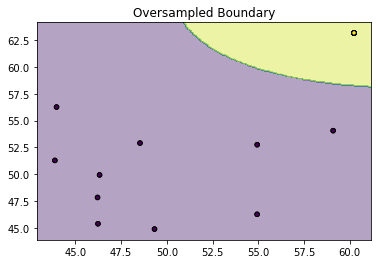

|    |   Yellow Accuracy  |   Purple Accuracy  |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|---------------------:|
|  0 |                  1 |                  1 |                    1 |


In [10]:
p = .1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

n = 10

from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)

mean = [60, 60]
cov = [[30, 0], [0, 30]]  # diagonal covariance

np.random.seed(1)
import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.ones(n)

mean = [50, 50]
cov = [[30, 0], [0, 30]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.zeros(n)

df1 = pd.concat([df1, df2], ignore_index=True)

df = pd.concat([df1, df2], ignore_index=True)

X = df.drop(['y'], axis=1)

y = df.y



df = df.drop(df.index[0:int((1-p)*n)], axis=0)

X = df.drop(['y'], axis=1)
y = df.y

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Data')

plt.savefig('ori'+str(p)+'.png', dpi=300)
plt.show()


clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)
clf.fit(X, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Boundary')

plt.savefig('ori_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())


from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(X, y)


# db on test data
x1 = x_res['x1']
x2 = x_res['x2']

clf.fit(x_res, y_res)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x1, x2, c=y_res, s=20, edgecolor='k')
plt.title('Oversampled Data')
plt.savefig('ov_data'+str(p)+'.png', dpi=300)
plt.show()

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_res,
                              s=20, edgecolor='k')
plt.title('Oversampled Boundary')
plt.savefig('ov_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())


# Undersampling

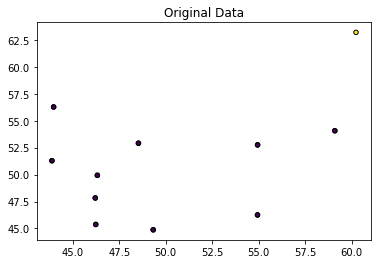

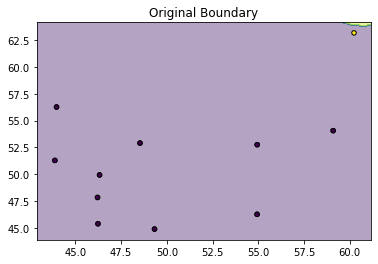

|    |   Yellow Accuracy  |   Purple Accuracy  |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|---------------------:|
|  0 |                  0 |                  1 |                  0.5 |


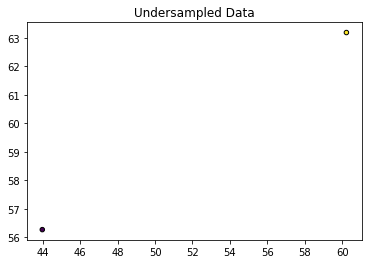

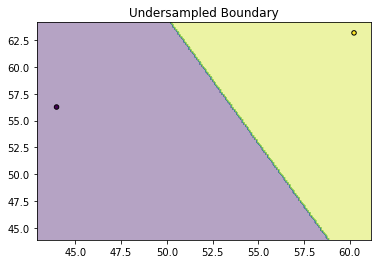

|    |   Yellow Accuracy  |   Purple Accuracy  |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|---------------------:|
|  0 |                  1 |                0.9 |                 0.95 |


In [12]:
p = .1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

n = 10

from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)

mean = [60, 60]
cov = [[30, 0], [0, 30]]  # diagonal covariance

np.random.seed(1)
import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.ones(n)

mean = [50, 50]
cov = [[30, 0], [0, 30]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.zeros(n)

df1 = pd.concat([df1, df2], ignore_index=True)

df = pd.concat([df1, df2], ignore_index=True)

X = df.drop(['y'], axis=1)

y = df.y



df = df.drop(df.index[0:int((1-p)*n)], axis=0)

X = df.drop(['y'], axis=1)
y = df.y

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Data')

plt.savefig('ori'+str(p)+'.png', dpi=300)
plt.show()


clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)
clf.fit(X, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Boundary')

plt.savefig('ori_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(X, y)


# db on test data
x1 = x_res['x1']
x2 = x_res['x2']

clf.fit(x_res, y_res)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x1, x2, c=y_res, s=20, edgecolor='k')
plt.title('Undersampled Data')
plt.savefig('un_data'+str(p)+'.png', dpi=300)
plt.show()

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_res,
                              s=20, edgecolor='k')
plt.title('Undersampled Boundary')
plt.savefig('un_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())


# Smote

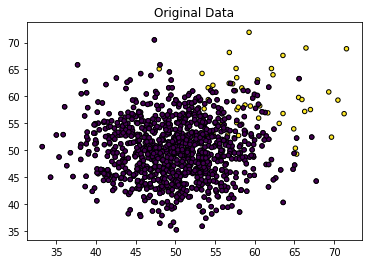

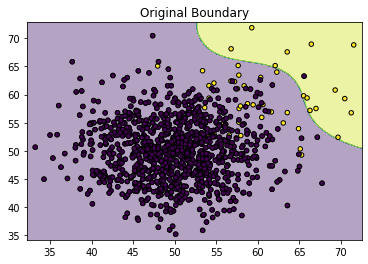

|    |   Yellow Accuracy  |   Purple Accuracy  |   Accuracy |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|-----------:|---------------------:|
|  0 |               0.28 |              0.999 |   0.981463 |               0.6395 |


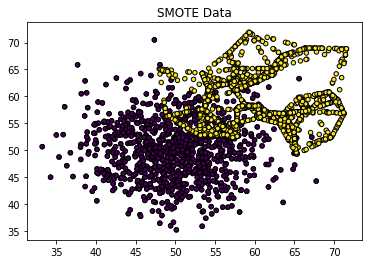

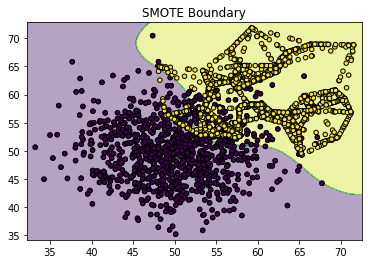

|    |   Yellow Accuracy  |   Purple Accuracy  |   Accuracy |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|-----------:|---------------------:|
|  0 |               0.96 |              0.864 |   0.866341 |                0.912 |


In [26]:
p = .05

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

n = 1000

from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)

mean = [60, 60]
cov = [[30, 0], [0, 30]]  # diagonal covariance

np.random.seed(1)
import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.ones(n)

mean = [50, 50]
cov = [[30, 0], [0, 30]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.zeros(n)

df1 = pd.concat([df1, df2], ignore_index=True)

df = pd.concat([df1, df2], ignore_index=True)

X = df.drop(['y'], axis=1)

y = df.y



df = df.drop(df.index[0:int((1-p)*n)], axis=0)

X = df.drop(['y'], axis=1)
y = df.y

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Data')

plt.savefig('smote_ori_data'+str(p)+'.png', dpi=300)
plt.show()


clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)
clf.fit(X, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Boundary')
plt.savefig('smote_ori_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())


from imblearn.over_sampling import SMOTE 
sm = SMOTE()
x_res, y_res = sm.fit_resample(X, y)


# db on test data
x1 = x_res['x1']
x2 = x_res['x2']

clf.fit(x_res, y_res)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x1, x2, c=y_res, s=20, edgecolor='k')

plt.title('SMOTE Data')
plt.savefig('smote_data'+str(p)+'.png', dpi=300)
plt.show()

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_res,
                              s=20, edgecolor='k')
plt.title('SMOTE Boundary')
plt.savefig('smote_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())


# BorderlineSMOTE

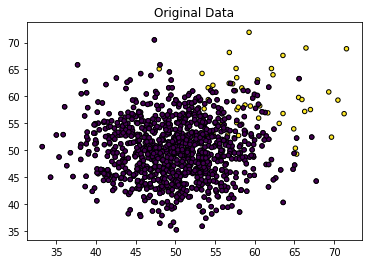

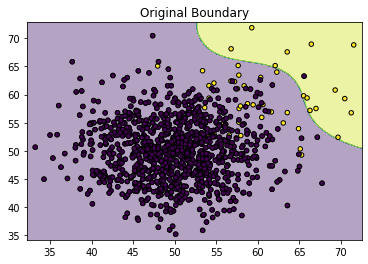

|    |   Yellow Accuracy  |   Purple Accuracy  |   Accuracy |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|-----------:|---------------------:|
|  0 |               0.28 |              0.999 |   0.981463 |               0.6395 |


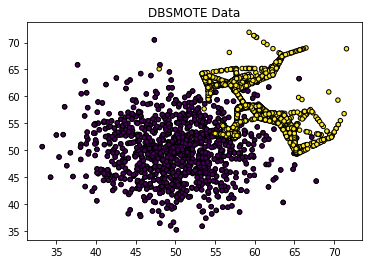

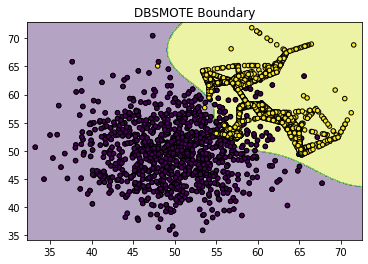

|    |   Yellow Accuracy  |   Purple Accuracy  |   Accuracy |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|-----------:|---------------------:|
|  0 |               0.86 |              0.919 |   0.917561 |               0.8895 |


In [25]:
p = .05

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

n = 1000

from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)

mean = [60, 60]
cov = [[30, 0], [0, 30]]  # diagonal covariance

np.random.seed(1)
import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.ones(n)

mean = [50, 50]
cov = [[30, 0], [0, 30]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.zeros(n)

df1 = pd.concat([df1, df2], ignore_index=True)

df = pd.concat([df1, df2], ignore_index=True)

X = df.drop(['y'], axis=1)

y = df.y



df = df.drop(df.index[0:int((1-p)*n)], axis=0)

X = df.drop(['y'], axis=1)
y = df.y

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Data')

plt.savefig('dbsmote_ori_data'+str(p)+'.png', dpi=300)
plt.show()


clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)
clf.fit(X, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Boundary')
plt.savefig('dbsmote_ori_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())

from imblearn.over_sampling import BorderlineSMOTE # doctest: +NORMALIZE_WHITESPACE

sm = BorderlineSMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X, y)




# db on test data
x1 = x_res['x1']
x2 = x_res['x2']

clf.fit(x_res, y_res)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x1, x2, c=y_res, s=20, edgecolor='k')

plt.title('DBSMOTE Data')
plt.savefig('dbsmote_data'+str(p)+'.png', dpi=300)
plt.show()

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_res,
                              s=20, edgecolor='k')
plt.title('DBSMOTE Boundary')
plt.savefig('dbsmote_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())


# KMeansSMOTE

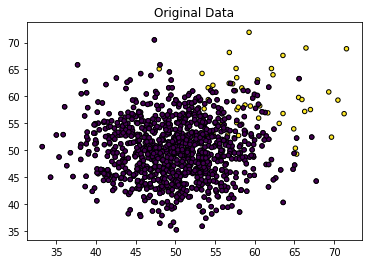

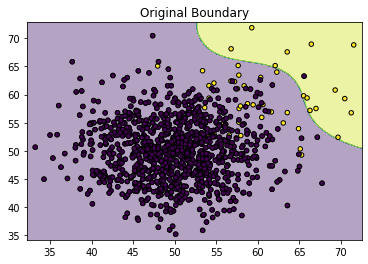

|    |   Yellow Accuracy  |   Purple Accuracy  |   Accuracy |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|-----------:|---------------------:|
|  0 |               0.28 |              0.999 |   0.981463 |               0.6395 |


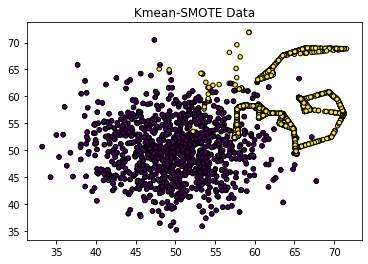

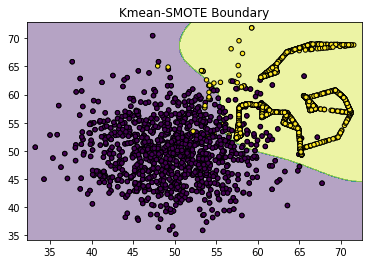

|    |   Yellow Accuracy  |   Purple Accuracy  |   Accuracy |   Balanced Accuracy  |
|---:|-------------------:|-------------------:|-----------:|---------------------:|
|  0 |               0.82 |               0.94 |   0.937073 |                 0.88 |


In [35]:
p = .05

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

n = 1000

from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)

mean = [60, 60]
cov = [[30, 0], [0, 30]]  # diagonal covariance

np.random.seed(1)
import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.ones(n)

mean = [50, 50]
cov = [[30, 0], [0, 30]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.zeros(n)

df1 = pd.concat([df1, df2], ignore_index=True)

df = pd.concat([df1, df2], ignore_index=True)

X = df.drop(['y'], axis=1)

y = df.y



df = df.drop(df.index[0:int((1-p)*n)], axis=0)

X = df.drop(['y'], axis=1)
y = df.y

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Data')

plt.savefig('kmeans_ori_data'+str(p)+'.png', dpi=300)
plt.show()


clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)
clf.fit(X, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Original Boundary')
plt.savefig('kmeans_ori_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())

from imblearn.over_sampling import KMeansSMOTE
sm = KMeansSMOTE(random_state=42, cluster_balance_threshold=.00010)

x_res, y_res = sm.fit_resample(X, y)




# db on test data
x1 = x_res['x1']
x2 = x_res['x2']

clf.fit(x_res, y_res)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x1, x2, c=y_res, s=20, edgecolor='k')

plt.title('Kmean-SMOTE Data')
plt.savefig('kmeans_data'+str(p)+'.png', dpi=300)
plt.show()

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_res,
                              s=20, edgecolor='k')
plt.title('Kmean-SMOTE Boundary')
plt.savefig('kmeans_db'+str(p)+'.png', dpi=300)
plt.show()

y_pred = clf.predict(X)
[tn, fp, fn, tp] = metrics.confusion_matrix(y, y_pred).ravel()
    
d = pd.DataFrame({
                    'Yellow Accuracy ':[tp/(tp+fn)],
                     'Purple Accuracy ':[tn/(tn+fp)],
                  'Balanced Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  
print(d.to_markdown())
